# **Phishing Domain Detection (Training Models)**

### The objective of this notebook is to test a couple of models to classify which one is best suited for detecting malicious domains

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
urldata = pd.read_csv("./Url_Processed.csv")

# droping "Unnamed: 0" as its unncessary feature
urldata.drop("Unnamed: 0",axis=1,inplace=True)

# remove uneccessary columns
urldata.drop(["url","label"],axis=1,inplace=True)

urldata.head()

,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1
1,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1
2,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1
3,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1
4,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1


In [5]:
#Independent Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']

In [6]:
# printing x
x.head()

,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1
1,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1
2,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1
3,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1
4,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1


In [7]:
# printing y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [9]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (691476, 16)
Size of y-sample : (691476, 1)


In [10]:
# DATA SPLITTING 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 16)
Shape of x_valid:  (138296, 16)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


## **Decision Tree**

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7)

model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.997
Accuracy on Testing dataset :  0.998


In [13]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     69054
   malicious       1.00      1.00      1.00     69242

    accuracy                           1.00    138296
   macro avg       1.00      1.00      1.00    138296
weighted avg       1.00      1.00      1.00    138296



## **Random Forest**

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=7)

# start training the model
model.fit(x_train,y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.997
Accuracy on Testing dataset :  0.998


In [17]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     69061
   malicious       1.00      1.00      1.00     69235

    accuracy                           1.00    138296
   macro avg       1.00      1.00      1.00    138296
weighted avg       1.00      1.00      1.00    138296



## **Multilayer Perceptron (Deep Learning)**

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [19]:
# model building
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# compiling model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [22]:
# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.1
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [23]:
# start training the model 
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step - acc: 0.6670 - loss: 0.6757 - val_acc: 0.9651 - val_loss: 0.1706
Epoch 2/10
2080/2161 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - acc: 0.9771 - loss: 0.1110
Reached 0.1 val_loss so cancelling training!
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - acc: 0.9774 - loss: 0.1096 - val_acc: 0.9938 - val_loss: 0.0324


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


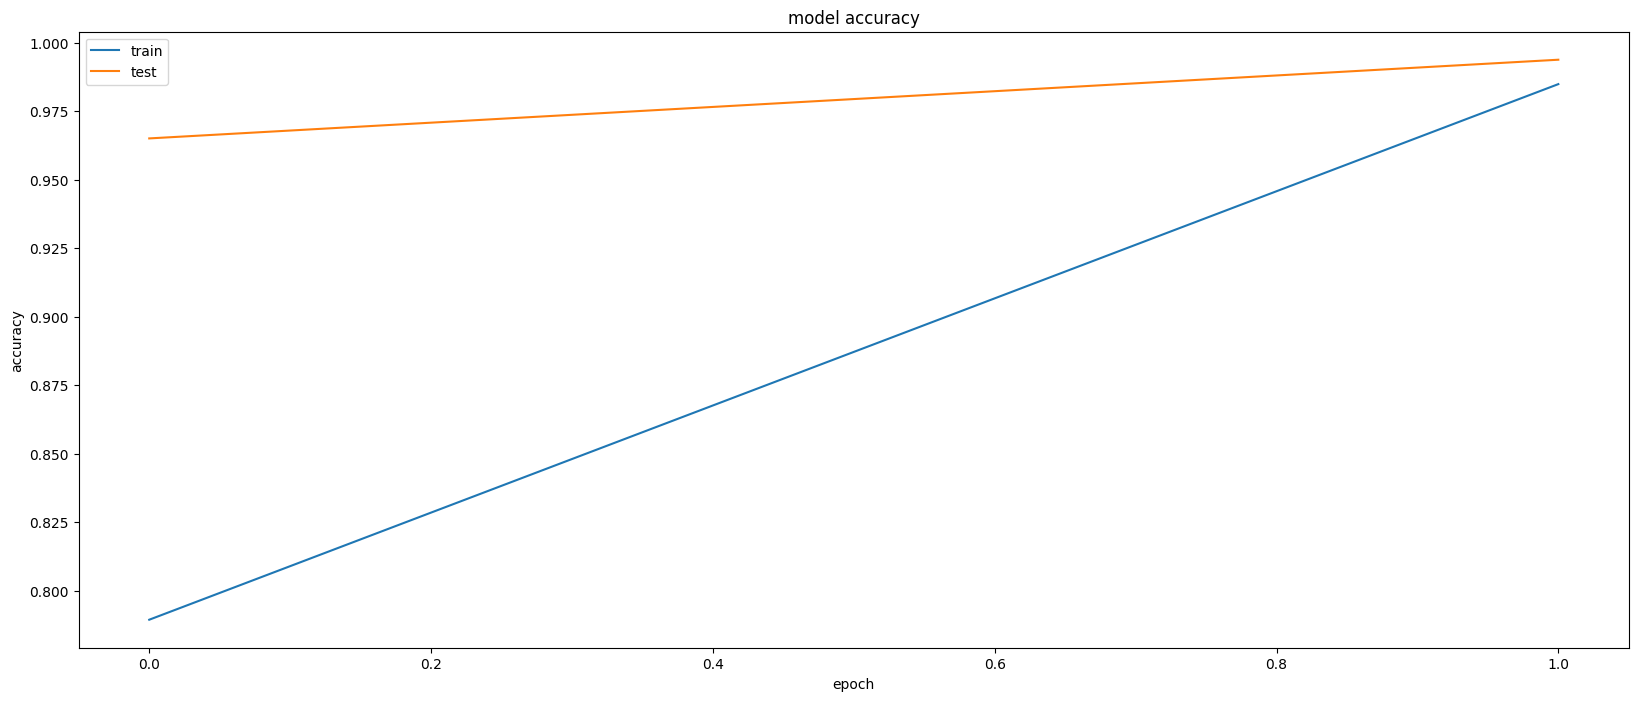

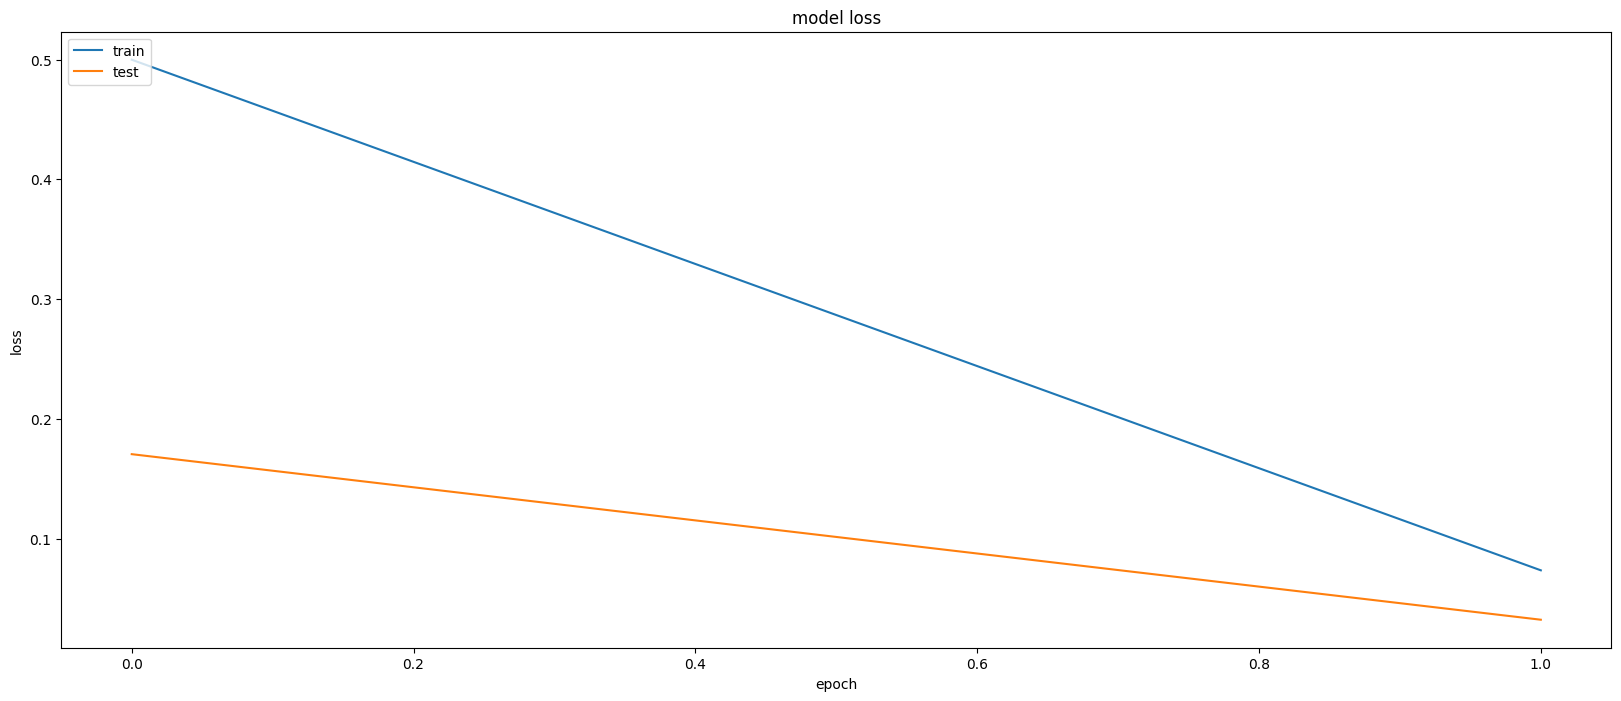

In [24]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [1]:
# **Multilayer Perceptron with Genetic Algorithm to Optimize Inputs**

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

def generate_individual():
    return [np.random.randint(8, 128), np.random.randint(8, 128), np.random.uniform(0.00001, 0.01)]

def generate_population(pop_size):
    return [generate_individual() for _ in range(pop_size)]

# Fitness function
def evaluate_individual(individual, x_train, y_train, x_val, y_val):
    model = Sequential()
    model.add(Input(shape=(16,)))  # ✅ Explicit Input layer
    model.add(Dense(individual[0], activation='relu'))
    model.add(Dense(individual[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    opt = Adam(learning_rate=individual[2])  # ✅ Use learning_rate instead of lr
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
    
    history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_val, y_val), verbose=0)
    return history.history['val_acc'][-1]

# Genetic algorithm parameters
population_size = 20
num_generations = 10
mutation_rate = 0.1

# Main loop
population = generate_population(population_size)
for generation in range(num_generations):
    print(f"Generation {generation + 1}/{num_generations}")
    
    # Evaluate fitness for each individual
    fitness_scores = []
    for individual in population:
        fitness = evaluate_individual(individual, x_train, y_train, x_test, y_test)
        fitness_scores.append(fitness)
    
    # Normalize fitness scores
    fitness_scores = np.array(fitness_scores)
    fitness_scores = fitness_scores / np.sum(fitness_scores)
    
    # Select parents based on fitness scores
    parents = np.random.choice(population, size=2, p=fitness_scores)
    
    # Crossover (uniform crossover)
    child = [parents[0][i] if np.random.rand() < 0.5 else parents[1][i] for i in range(3)]
    
    # Mutation
    for i in range(3):
        if np.random.rand() < mutation_rate:
            if i == 2:  # Learning rate mutation
                child[i] = np.random.uniform(0.00001, 0.01)
            else:
                child[i] = np.random.randint(8, 128)
    
    # Replace a random individual in the population with the child
    random_index = np.random.randint(0, population_size)
    population[random_index] = child

# Find the best individual after all generations
best_index = np.argmax(fitness_scores)
best_individual = population[best_index]
print("\nBest individual:", best_individual)


Generation 1/10


KeyboardInterrupt: 

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])

PREDICTED : 
Non Mallicious
Mallicious
Mallicious
Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Mallicious


ACTUAL : 
Non Mallicious
Mallicious
Mallicious
Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Mallicious


### **Saving the prediction model**

In [43]:
# Save Model Weights and Architecture Together
model.save("Malicious_URL_Prediction.h5")